In [1]:
import mdls.transpose as tr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math as mt
import random
import scipy
import seaborn as sns
from scipy.stats.mstats import f_oneway
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import FactorAnalysis
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.decomposition import NMF
import numba

In [2]:
NAME_FILE_SCORE_UNIVARIATE_ANALYSIS = 'Score_for_univariate_analysis.csv'
NAME_FILE_GRADE_UNIVARIATE_ANALYSIS = 'Grade_for_univariate_analysis.csv'
NAME_FILE_BOTH_UNIVARIATE_ANALYSIS = 'Both_for_univariate_analysis.csv'
NAME_FILE_AF_GR2_ANALYSIS = 'af_gr2_analysis.csv'
NAME_FILE_GR1_ANALYSIS = 'gr1_analysis.csv'
NAME_FILE_GR2_ANALYSIS = 'gr2_analysis.csv'
REPORT_FILE_NAME = "OpenFoodFactReport.html"
NAME_FILE_ORIGINAL = 'fr.openfoodfacts.org.products.csv'
NAME_FILE_PICKLE = 'fr.openfoodfacts.org.products.dat'
LEVEL_OF_NULL_FILTER = 80  # In pourcents

# Méthode Descriptive

## Analyses en Composantes Principales

In [3]:
data_score = pd.read_csv(NAME_FILE_SCORE_UNIVARIATE_ANALYSIS, sep='\t', index_col=0)
data_grade = pd.read_csv(NAME_FILE_GRADE_UNIVARIATE_ANALYSIS, sep='\t', index_col=0)

In [4]:
Xy_df = data_score

In [5]:
Xy_df.columns, Xy_df.count()

(Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
        'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
        'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
        'vitamin-c_100g', 'calcium_100g', 'iron_100g',
        'nutrition-score-fr_100g'],
       dtype='object'),
 energy_100g                221210
 fat_100g                   221210
 saturated-fat_100g         221210
 trans-fat_100g             221210
 cholesterol_100g           221210
 carbohydrates_100g         221210
 sugars_100g                221210
 fiber_100g                 221210
 proteins_100g              221210
 salt_100g                  221210
 sodium_100g                221210
 vitamin-a_100g             221210
 vitamin-c_100g             221210
 calcium_100g               221210
 iron_100g                  221210
 nutrition-score-fr_100g    221210
 dtype: int64)

Comme nous pouvons le voir sur l'éboulis des valeurs propres cumulées, nous pouvons prendre 8 composantes pour expliquer nos descripteurs car nous aurons plus de 80 % d'explication des variances, ce qui est tolérable.

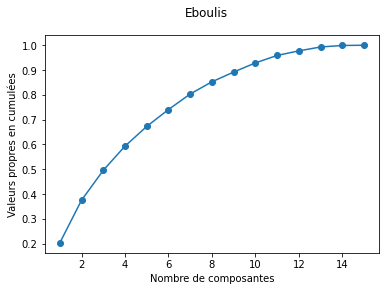

In [6]:
tr.eboulis(Xy_df)

Nous rédigeons notre fonction pour calculer les composantes et trouvons que la somme de l'explication des variances vaut 85,25 % pour 8 composantes.

In [7]:
pca, X_scaled, X = tr.pca_fct(Xy_df, ['nutrition-score-fr_100g'], 8)

In [8]:
pca.explained_variance_ratio_.sum()

0.8525566717235509

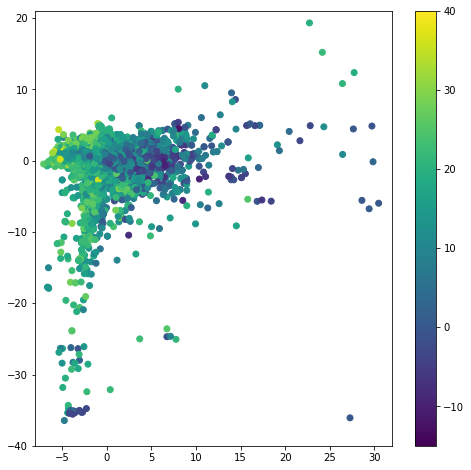

In [9]:
tr.scatter_points(pca, X_scaled, Xy_df, 'nutrition-score-fr_100g', [[-8, 32],[-40,21]], 3,6)

Nous représentons ci-dessus le nuage de point selon le nutri-score sur les axes d'inertie 3 et 6. Puis, ci-dessous nous étudions les 4 plans de composantes principales avant d'en sélectionner un qui conviendra parfaitement.

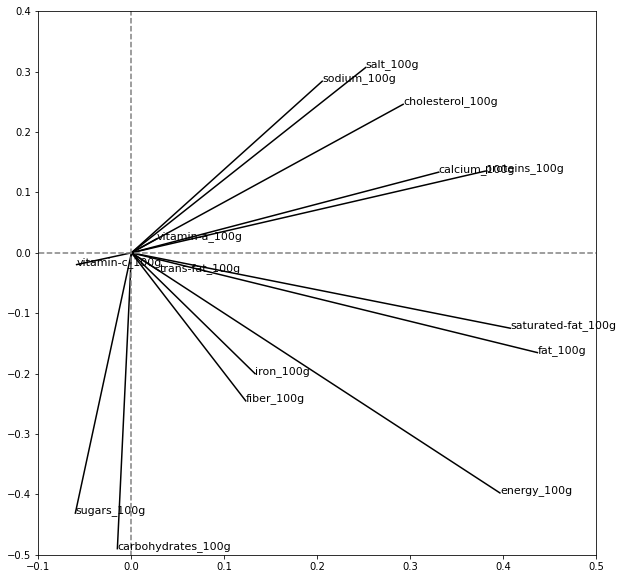

In [10]:
tr.acp_graph(pca, X, [[-0.1, 0.5],[-0.5,0.4]], 0,1)

Les vitamines et les graisses hydrogénées sont mal représentées par ces composantes. Nous retrouvons les corrélations que nous avons déjà observés dans la matrice de corrélations. Le second axe est précis sur les glucides. L'autre axe rend compte plus de la graisse et des protéines. L'énergie est une dominante du schéma.

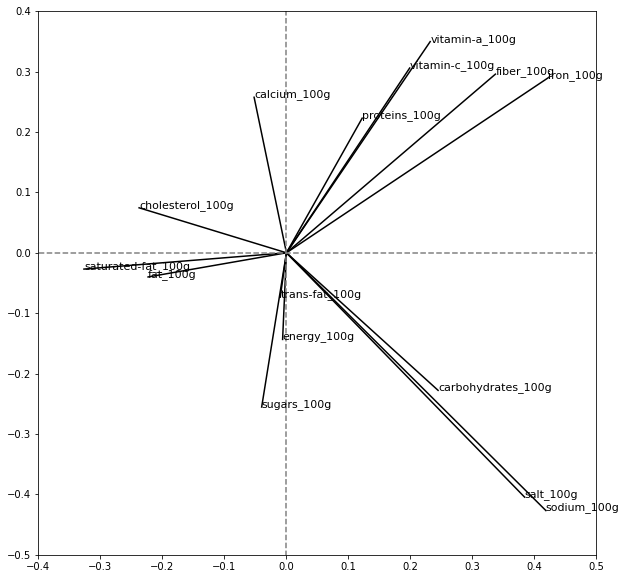

In [11]:
tr.acp_graph(pca, X, [[-0.4, 0.5],[-0.5,0.4]], 2,3)

Les vitamines, le sel et le sodium, et les acides-gras et graisses saturées  tout comme le fer et les fibres sont assez proche. Seuls le sucre et les glucides et les protéines et le calcium font un angle aigu par rapport à la seconde composante. L'énergie et les acides-gras hydrogénées ne sont pas bien représentés par le schéma.

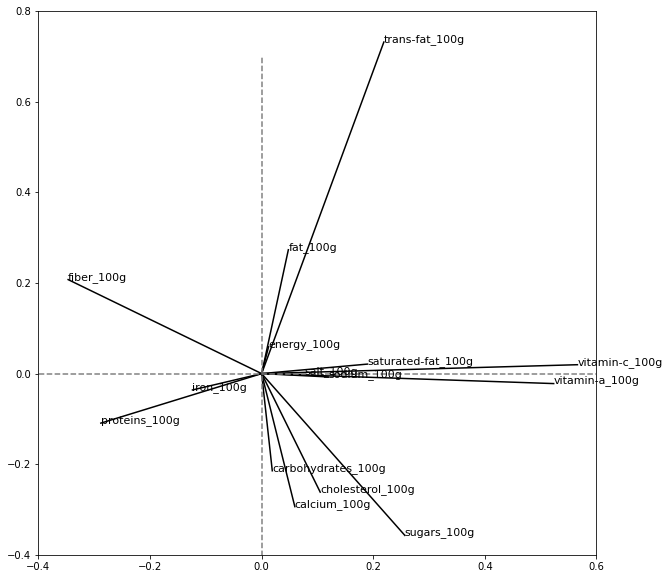

In [12]:
tr.acp_graph(pca, X, [[-0.4, 0.6],[-0.4,0.8]], 4,5)

On voit qu'on peut corréler les vitamines, mais pas les acides-gras et acides-gras hydrogénées leur influence ainsi que leur pondération n'a donc rien à voir en terme de générique ou sur le plan gustatif. Le fer est ici mieux assimilé par les protéines animales que quand il se trouve dans les fibres végétales, et le schéma le traduit ici.

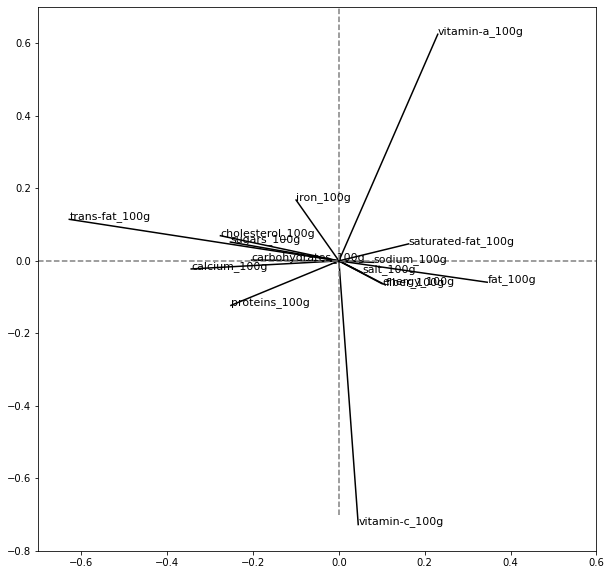

In [13]:
tr.acp_graph(pca, X, [[-0.7, 0.6],[-0.8,0.7]], 6,7)

Ici, les grandes corrélations montre l'influence positive pour les petites quantités de vitamines en permettant d'éviter des maladies comme le scorbut, et l'influence négative de petite quantité d'acide-gras hydrogénées qui bénéficie au stockage longue durée des denrées, à la résistance à la chaleur, mais dont la nocivité est énorme pour notre capital santé. À noter l'angle que forme la droite du fer et de la protéine n'est pas sans rappeler l'angle droit, fondement de la géométrie, pour le fondement du régime alimentaire omnivore. Les apports dans ses deux constituants que sont le fer et les protéines doivent être régulier, un manque serait une catastrophe pour la santé. Heureusement nous pouvons les trouver aussi chez le règne végétal.

## ANALYSE FACTORIELLE

In [14]:
#Xy_df = pd.read_csv(NAME_FILE_GRADE_UNIVARIATE_ANALYSIS, index_col=0, sep='\t')

In [15]:
#NAME_FILE_PICKLE = 'fr.openfoodfacts.org.products.dat'
#df = pd.read_pickle(NAME_FILE_PICKLE)

In [16]:
#X = Xy_df.drop('nutrition_grade_fr', axis=1)

In [17]:
#from sklearn.decomposition import FactorAnalysis
#X_fa = X.copy()
#transformer = FactorAnalysis(n_components=15, random_state=0, max_iter=1000)
#X_transformed = transformer.fit_transform(X_fa)

In [18]:
#columns_dict: dict = {}
#i = 0
#for col in list(X.columns):
#    columns_dict.update({i: col})
#    i += 1
#X_fa_df = pd.DataFrame(X_transformed)
#X_fa_df = X_fa_df.rename(columns=columns_dict)
#X_fa_df.index = X.index

In [19]:
#X_fa_df['pnns_groups_2'] = df['pnns_groups_2'].copy()

In [20]:
#X_fa_df.to_csv(NAME_FILE_AF_GR2_ANALYSIS, sep='\t')

In [21]:
X_fa_df = pd.read_csv(NAME_FILE_AF_GR2_ANALYSIS, index_col=0, sep='\t')

In [22]:
X_fa_df['pnns_groups_2'] = X_fa_df['pnns_groups_2'].replace('legumes', 'Legumes')
X_fa_df['pnns_groups_2'] = X_fa_df['pnns_groups_2'].replace('fruits', 'Fruits')
X_fa_df['pnns_groups_2'] = X_fa_df['pnns_groups_2'].replace('vegetables', 'Vegetables')
X_fa_df['pnns_groups_2'] = X_fa_df['pnns_groups_2'].replace('cereals', 'Cereals')
X_fa_df['pnns_groups_2'] = X_fa_df['pnns_groups_2'].replace('nuts', 'Nuts')

In [23]:
X_fa_df = X_fa_df[~X_fa_df['pnns_groups_2'].isnull()]

In [24]:
X_fa_df = X_fa_df.groupby(by=["pnns_groups_2"]).mean()

In [25]:
translate = {'unknown':'unknown',
    'Vegetables': 'Légumes',
 'Biscuits and cakes': 'Biscuits et gâteaux',
 'Pizza pies and quiche': 'Pizzas et quiches',
 'Sweets': 'Bonbons',
 'Sweetened beverages': 'Boissons sucrées',
 'One-dish meals': 'Plats cuisinées',
 'Soups': 'Soupes',
 'Meat': 'Viandes',
 'Dressings and sauces': 'Vinaigrettes et sauces',
 'Cereals': 'Céréales',
 'Fruits': 'Fruits',
 'Milk and yogurt': 'Lait et yaourt',
 'Fats': 'Graisses',
 'Non-sugared beverages': 'Boissons non-sucrées',
 'Cheese': 'Fromages',
 'Chocolate products': 'Produits chocolatés',
 'Sandwich': 'Sandwichs',
 'Bread': 'Pains',
 'Nuts': 'Noisettes',
 'Legumes': 'Légumineuses',
 'Breakfast cereals': 'Céréales petits-déj.',
 'Appetizers': 'Biscuits apéritifs',
 'Fruit juices': 'Jus de fruits',
 'Eggs': 'Œufs',
 'Fish and seafood': 'Poissons et produits de la mer',
 'Dried fruits': 'Fruits secs',
 'Ice cream': 'Crèmes glacées',
 'Processed meat': 'Viandes transformées',
 'pastries': 'Pâtes',
 'Dairy desserts': 'Produits laitiers',
 'Alcoholic beverages': 'Alcool',
 'Potatoes': 'Pommes de terre',
 'Artificially sweetened beverages': 'Boissons édulcorées artificiellement',
 'Fruit nectars': 'Nectars de fruits',
 'Salty and fatty products': 'Produits gras et salés',
 'Tripe dishes': 'Abats'}

In [26]:
X_fa_df.index = X_fa_df.index.map(translate)# = X_nmf_['pnns_groups_2'].map(translate)

In [27]:
X_fa_df = X_fa_df.sort_values(by='pnns_groups_2', axis=0)

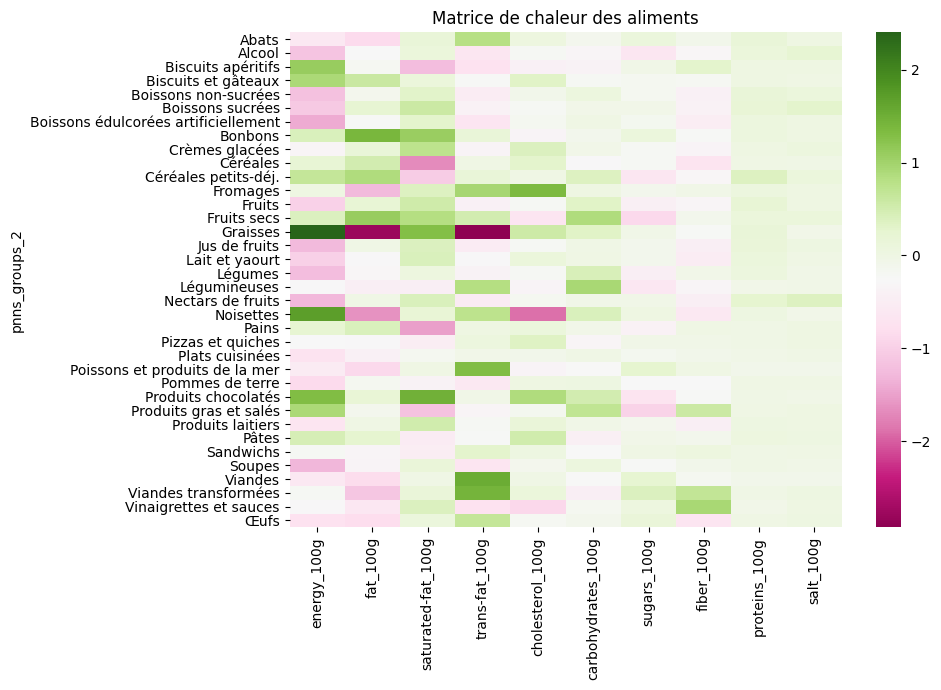

In [28]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(X_fa_df.drop('unknown', axis=0).drop(['sodium_100g', 'iron_100g', 'vitamin-c_100g', 
                                                 'vitamin-a_100g', 'calcium_100g'], axis=1), cmap='PiYG')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 100
plt.tight_layout()
plt.title('Matrice de chaleur des aliments')
plt.tight_layout()
plt.savefig('food_af_heatmap.png')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Ci-dessus, nous faisons le constat que le sens de l'analyse factorielle n'est pas très adapté à notre problématique puisqu'il s'agit de mesurer si un constituant définie un aliment. Plus la valeur est éloignée de zéro et plus l'aliment est définissable par ce constituant par rapport aux autres aliments. Plus la valeur est proche de zéro et moins l'aliment est un représentant de ce constituant. De la sorte, si nous tirions au hasard 1 produit parmi les Fats, nous pouvons être sûr qu'il sera très riche en énergie et en graisse. Par contre, nous ne pouvons pas garantir qu'il sera salé.

<AxesSubplot:title={'center':'Quantité moyenne de sucre et de glucides,\nselon le nutri-score'}, xlabel='nutri-score', ylabel='carbohydrates and sugars mean'>

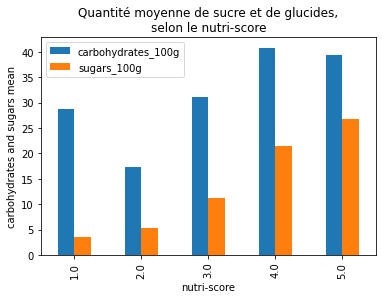

In [29]:
%matplotlib inline
data_proportion_of_sugar_in_carbohydrates = data_grade[['carbohydrates_100g', 'sugars_100g', 'nutrition_grade_fr']].groupby(by=['nutrition_grade_fr']).mean()
df_one = data_proportion_of_sugar_in_carbohydrates  # to make the code clearer
df_one.plot(kind='bar', xlabel='nutri-score', ylabel='carbohydrates and sugars mean', title='Quantité moyenne de sucre et de glucides,\nselon le nutri-score')

Nous remarquons que la part du sucre dans le glucide augmente avec le nutri-score.

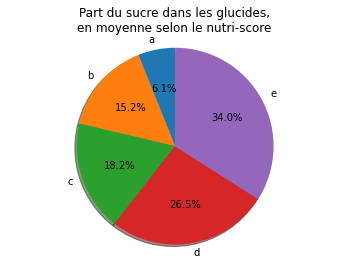

In [30]:
df_one['proportion_of_sugars'] = df_one['sugars_100g'].mul(100).div(df_one['carbohydrates_100g'])#.plot(kind='bar')
a = df_one.iloc[:,-1]
labels = ['a', 'b', 'c', 'd', 'e']
sizes = a.values.reshape(5,)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Part du sucre dans les glucides,\nen moyenne selon le nutri-score')
plt.show()
fig1.savefig('pie_chart_sugars_carbohydrates_ratio.png')

Comme nous le voyons de plus dans cet autre graphique, plus la note est mauvaise, et plus les glucides sont chargés en sucre rapide.

## Non-negative Matrice Factorization

### Étude par nutri-score

In [31]:
Xy_df = pd.read_csv(NAME_FILE_GRADE_UNIVARIATE_ANALYSIS, index_col=0, sep='\t')

In [32]:
#NAME_FILE_PICKLE = 'fr.openfoodfacts.org.products.dat'
#df = pd.read_pickle(NAME_FILE_PICKLE)

In [33]:
X_nmf_ = pd.DataFrame()
Xy_df = Xy_df[~Xy_df['nutrition_grade_fr'].isna()].copy()
for i in range(1,6):
    X = Xy_df[['energy_100g', 'fat_100g','saturated-fat_100g', 'trans-fat_100g', 
               'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g']].loc[Xy_df['nutrition_grade_fr'] == i]
    model = NMF(n_components=1, init='random', random_state=0)
    W = model.fit_transform(X[(X >= 0).all(axis=1)])
    H = model.components_
    X_nmf = H
    columns_dict: dict = {}
    j = 0
    for col in list(X.columns):
        columns_dict.update({j: col})
        j += 1
    X_nmf_df = pd.DataFrame(X_nmf)
    X_nmf_df = X_nmf_df.rename(columns=columns_dict)
    X_nmf_ = X_nmf_.append(X_nmf_df, ignore_index=True)
# Réattribuer les notes
X_nmf_['nutrition_grade_fr'] =  range(1,6)
X_nmf_['nutrition_grade_fr'] = X_nmf_['nutrition_grade_fr'].map({1: 'a', 2: 'b', 3: 'c', 4: 'd', 5:'e'})
# Les placer en index
X_nmf_ = X_nmf_.set_index('nutrition_grade_fr')
X_nmf_

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g
nutrition_grade_fr,,,,,,,,
a,78.538340,0.287564,0.034019,0.001262,0.000607,3.287448,0.233942,0.432404
b,66.518589,0.598078,0.082642,0.001365,0.000781,2.093440,0.361800,0.219805
c,92.967845,1.061201,0.166847,0.001958,0.000539,2.637580,0.777860,0.309239
d,112.865038,1.464266,0.434941,0.007387,0.001208,2.906536,1.435359,0.216354
e,126.082309,1.964550,0.965846,0.008680,0.002165,2.597321,1.750988,0.111468


Ici, le tri par nutri-grade n'est pas efficace pour obtenir de l'information, même si nous voyons bien les éléments qui progresse à mesure que la note baisse, et que les fibres au contraire, descendent, faisant monter la note. Nous préférons représenter cela par catégorie comme tout à l'heure.

### Étude par groupe d'aliments

In [34]:
#NAME_FILE_PICKLE = 'fr.openfoodfacts.org.products.dat'
#df = pd.read_pickle(NAME_FILE_PICKLE)

In [35]:
Xy_one_df = pd.read_csv(NAME_FILE_GRADE_UNIVARIATE_ANALYSIS, index_col=0, sep='\t')
x = Xy_one_df.drop('nutrition_grade_fr', axis=1).values

In [36]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_transformed = pd.DataFrame(x_scaled)

In [37]:
columns_dict: dict = {}
i = 0
for col in list(Xy_one_df.columns):
    columns_dict.update({i: col})
    i += 1
Xy_two_df = pd.DataFrame(x_transformed)
Xy_two_df = Xy_two_df.rename(columns=columns_dict)
Xy_two_df.index = Xy_one_df.index

In [38]:
#Xy_two_df['pnns_groups_1'] = df['pnns_groups_1'].copy()

In [39]:
#Xy_two_df = Xy_two_df[~Xy_two_df['pnns_groups_1'].isnull()]

In [40]:
#Xy_two_df.to_csv(NAME_FILE_GR1_ANALYSIS, sep='\t')

In [41]:
Xy_two_df = pd.read_csv(NAME_FILE_GR1_ANALYSIS, index_col=0, sep='\t')

In [42]:
X_nmf_ = pd.DataFrame()
for i in list(Xy_two_df['pnns_groups_1'].unique()):
    X = Xy_two_df[['energy_100g', 'fat_100g','saturated-fat_100g', 'trans-fat_100g', 
               'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g']].loc[Xy_two_df['pnns_groups_1'] == i]
    model = NMF(n_components=1, init='random', random_state=0)
    W = model.fit_transform(X[(X >= 0).all(axis=1)])
    H = model.components_
    X_nmf = H
    columns_dict: dict = {}
    j = 0
    for col in list(X.columns):
        columns_dict.update({j: col})
        j += 1
    X_nmf_df = pd.DataFrame(X_nmf)
    X_nmf_df = X_nmf_df.rename(columns=columns_dict)
    X_nmf_ = X_nmf_.append(X_nmf_df, ignore_index=True)
# Réattribuer les notes
X_nmf_['pnns_groups_1'] =  list(Xy_two_df['pnns_groups_1'].unique())
# Les placer en index
X_nmf_ = X_nmf_.set_index('pnns_groups_1')
X_nmf_

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g
pnns_groups_1,,,,,,,,
unknown,1.314846,0.563047,0.234055,0.007816,0.018834,1.528540,0.768050,0.247629
Fruits and vegetables,0.726887,0.144829,0.059741,0.002236,0.005323,1.200364,0.935890,0.324188
Sugary snacks,1.620469,0.684782,0.373126,0.009646,0.016924,2.038569,1.471906,0.224750
Composite foods,1.138741,0.477273,0.175793,0.006026,0.038265,1.073925,0.142528,0.253331
Beverages,0.524122,0.046611,0.031063,0.006383,0.017987,1.069041,0.970520,0.071270
Fish Meat Eggs,1.386156,0.984230,0.357343,0.008344,0.086397,0.135347,0.046010,0.117721
Fat and sauces,1.957700,1.987011,0.691940,0.017345,0.027591,0.134884,0.066216,0.134597
Cereals and potatoes,1.476594,0.244129,0.073132,0.004109,0.009987,2.406763,0.309395,0.461353
Milk and dairy products,1.281554,0.909265,0.659728,0.006286,0.076100,0.357445,0.290199,0.187515


Ici nous synthétisons les forces et les composantes majeures de chaque groupe d'aliments.

### Étude par type d'aliments

In [43]:
Xy_one_df = pd.read_csv(NAME_FILE_GRADE_UNIVARIATE_ANALYSIS, index_col=0, sep='\t')
x = Xy_one_df.drop('nutrition_grade_fr', axis=1).values

In [44]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_transformed = pd.DataFrame(x_scaled)

In [45]:
columns_dict: dict = {}
i = 0
for col in list(Xy_one_df.columns):
    columns_dict.update({i: col})
    i += 1
Xy_two_df = pd.DataFrame(x_transformed)
Xy_two_df = Xy_two_df.rename(columns=columns_dict)
Xy_two_df.index = Xy_one_df.index

In [46]:
#Xy_two_df['pnns_groups_2'] = df['pnns_groups_2'].copy()

In [47]:
#Xy_two_df['pnns_groups_2'] = Xy_two_df['pnns_groups_2'].replace('legumes', 'Legumes')
#Xy_two_df['pnns_groups_2'] = Xy_two_df['pnns_groups_2'].replace('fruits', 'Fruits')
#Xy_two_df['pnns_groups_2'] = Xy_two_df['pnns_groups_2'].replace('vegetables', 'Vegetables')
#Xy_two_df['pnns_groups_2'] = Xy_two_df['pnns_groups_2'].replace('cereals', 'Cereals')
#Xy_two_df['pnns_groups_2'] = Xy_two_df['pnns_groups_2'].replace('nuts', 'Nuts')

In [48]:
#Xy_two_df = Xy_two_df[~Xy_two_df['pnns_groups_2'].isnull()]

In [49]:
#Xy_two_df.to_csv(NAME_FILE_GR2_ANALYSIS, sep='\t')

In [50]:
Xy_two_df = pd.read_csv(NAME_FILE_GR2_ANALYSIS, index_col=0, sep='\t')

In [51]:
X_nmf_ = pd.DataFrame()
for i in list(Xy_two_df['pnns_groups_2'].unique()):
    X = Xy_two_df[['energy_100g', 'fat_100g','saturated-fat_100g', 'trans-fat_100g', 
               'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g','fiber_100g']].loc[Xy_two_df['pnns_groups_2'] == i]
    model = NMF(n_components=1, init='random', random_state=0)
    W = model.fit_transform(X[(X >= 0).all(axis=1)])
    H = model.components_
    X_nmf = H
    columns_dict: dict = {}
    j = 0
    for col in list(X.columns):
        columns_dict.update({j: col})
        j += 1
    X_nmf_df = pd.DataFrame(X_nmf)
    X_nmf_df = X_nmf_df.rename(columns=columns_dict)
    X_nmf_ = X_nmf_.append(X_nmf_df, ignore_index=True)
# Réattribuer les notes
X_nmf_['pnns_groups_2'] =  list(Xy_two_df['pnns_groups_2'].unique())
# Les placer en index
X_nmf_ = X_nmf_.set_index('pnns_groups_2')
X_nmf_

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,fiber_100g
pnns_groups_2,,,,,,,,,
unknown,1.345689,0.590816,0.241766,0.008211,0.021084,1.515810,0.741068,0.724617,0.254699
Vegetables,0.596409,0.212769,0.040842,0.004622,0.012953,0.592519,0.216841,1.484948,0.514732
Biscuits and cakes,1.649455,0.686199,0.351625,0.011562,0.016699,2.064068,1.060339,0.432382,0.221675
Pizza pies and quiche,1.374619,0.544650,0.288341,0.008940,0.054211,1.405332,0.171139,1.381977,0.212044
Sweets,1.265447,0.310316,0.134104,0.006082,0.008317,2.167992,1.793437,0.094981,0.126063
Sweetened beverages,0.579792,0.039160,0.032068,0.006416,0.015285,1.221052,1.147431,0.075518,0.058993
One-dish meals,1.138201,0.497833,0.166718,0.005893,0.039457,1.002631,0.145573,1.390902,0.286471
Soups,0.603641,0.240154,0.093512,0.004907,0.024888,0.643039,0.253871,1.880396,0.307541
Meat,1.105527,0.559118,0.223310,0.004565,0.093425,0.189242,0.055980,2.328746,0.152571


In [52]:
translate = {'unknown':'unknown',
    'Vegetables': 'Légumes',
 'Biscuits and cakes': 'Biscuits et gâteaux',
 'Pizza pies and quiche': 'Pizzas et quiches',
 'Sweets': 'Bonbons',
 'Sweetened beverages': 'Boissons sucrées',
 'One-dish meals': 'Plats cuisinées',
 'Soups': 'Soupes',
 'Meat': 'Viandes',
 'Dressings and sauces': 'Vinaigrettes et sauces',
 'Cereals': 'Céréales',
 'Fruits': 'Fruits',
 'Milk and yogurt': 'Lait et yaourt',
 'Fats': 'Graisses',
 'Non-sugared beverages': 'Boissons non-sucrées',
 'Cheese': 'Fromages',
 'Chocolate products': 'Produits chocolatés',
 'Sandwich': 'Sandwichs',
 'Bread': 'Pains',
 'Nuts': 'Noisettes',
 'Legumes': 'Légumineuses',
 'Breakfast cereals': 'Céréales petits-déj.',
 'Appetizers': 'Biscuits apéritifs',
 'Fruit juices': 'Jus de fruits',
 'Eggs': 'Œufs',
 'Fish and seafood': 'Poissons et produits de la mer',
 'Dried fruits': 'Fruits secs',
 'Ice cream': 'Crèmes glacées',
 'Processed meat': 'Viandes transformées',
 'pastries': 'Pâtes',
 'Dairy desserts': 'Produits laitiers',
 'Alcoholic beverages': 'Alcool',
 'Potatoes': 'Pommes de terre',
 'Artificially sweetened beverages': 'Boissons édulcorées artificiellement',
 'Fruit nectars': 'Nectars de fruits',
 'Salty and fatty products': 'Produits gras et salés',
 'Tripe dishes': 'Abats'}

In [53]:
X_nmf_.index = X_nmf_.index.map(translate)# = X_nmf_['pnns_groups_2'].map(translate)

In [54]:
X_nmf_ = X_nmf_.sort_values(by='pnns_groups_2', axis=0)

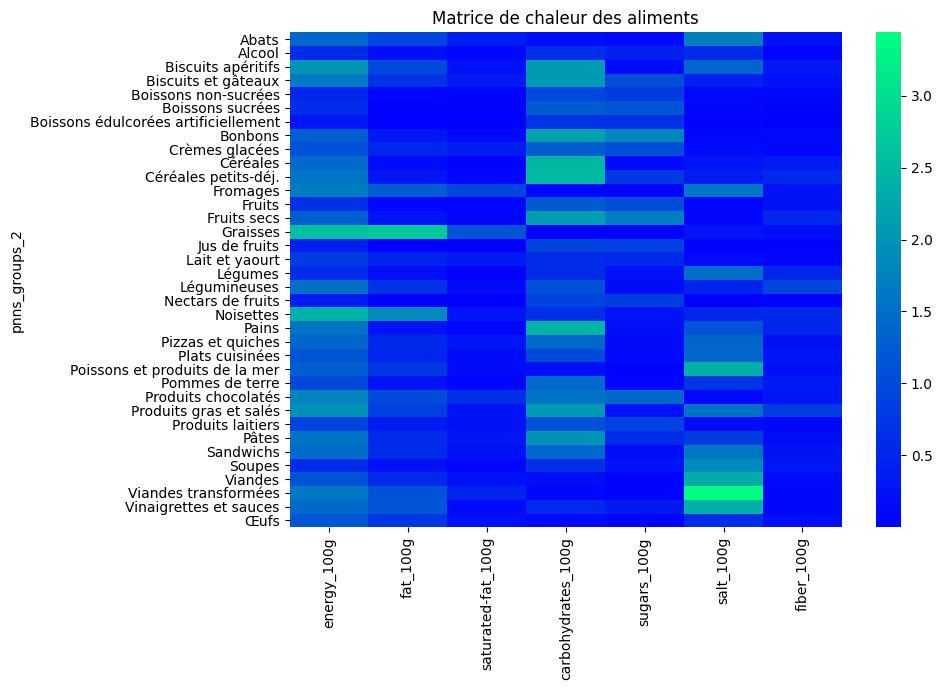

In [55]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(X_nmf_.drop('unknown', axis=0).drop(['trans-fat_100g', 'cholesterol_100g'], axis=1), cmap='winter')
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 100
plt.tight_layout()
plt.title('Matrice de chaleur des aliments')
plt.tight_layout()
plt.savefig('food_heatmap.png')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Ici nous récapitulons les forces et les faiblesses de chaque catégories d'aliments.

#### Conclusion

    Dans les tableaux précédents nous récapitulons les caractèristiques entre les aliments de toutes les catégories, nous remarquons que tous sont particuliés. Il est recommandé d'en manger en quantité "normale", et en variant les apports et les sources nutritives. Certains aliments sont bénéfiques comme les anti-oxydants ou les oméga-3, mais nous avons pas eu assez de détail pour pousser en avant la réflexion en nous appuyant sur des data. 

    À noter que les graisses hydrogénées sont comme chacun le sait sans doute, le symbole de la nourriture des chaînes de fast-food, car elles ont remarquées que les graisses hydrogénées entraînent notre circuit de récompense dans le cerveau et peuvent, par ce biais, provoquer une dépendance avec un comportement d'achat compulsif, pouvant entraîner du surpoids voire de l'obésité, selon votre Indice de Masse Corporelle, ou plus simplement, votre IMC. D'ailleurs il se calcule comme suit, selon votre poids P et votre taille T : 
    
$IMC = P/T^2$ 
    
    Impossible de passer à côté que de plus en plus de gens associent les graisses hydrogénées à l'image d'une industrie alimentaire hyper-capitaliste et financière, en tout les cas peu soucieuse de notre planète. Ces graisses sont à éviter aussi dans la margarine, ou les pâtisseries. Moins cher à produire elle représente un atout pour l'industrie alimentaire. 
    
    Toutefois en vous autorisant juste de petits écarts dans vos habitudes alimentaires vous vous soucierez ainsi mieux de l'empreinte carbonne des aliments que vous digérez.

# Méthode Explicative

## ANOVA 

Nous nous assurons que :

1. Chaque population dont provient l'échantillon est dans la loi normale; 
2. Tous les échantillons sont sélectionnés aléatoirement et sont indépendants;
3. Les populations sont supposées avoir des écarts-types égaux;
4. Le facteur est une variable de catégorie;
5. La réponse est une variable numérique.

Posons l'hypothèse nulle $H_0$ qui pour chaque variable, considère que la quantité moyenne, dans chaque groupe de nutri-score, de chacun des 15 variables que nous analysons, n'a pas d'influence car les moyennes de chaque groupe de chaque variable sont égales. Cela nous fera une hypothèse par variable, soit 15 hypothèse.

De même, posons l'hypothèse alternative qui considère que pour chaque groupe de nutri-score, nous avons des moyennes de quantités de produits qui sont inégales pour chacun des 10 échantillons de chacun de nos 15 variables. 

Plaçons nous dans un intervalle de confiance de 95% soit pour un intervalle de signification $\alpha = 0.05$.

Créons notre échantillonnage :

In [56]:
data = pd.read_csv(NAME_FILE_GRADE_UNIVARIATE_ANALYSIS, sep='\t', index_col=0)

Créons notre catégorie en facteur :

In [57]:
data['nutrition-score-fr_100g'] = data.nutrition_grade_fr.map({1: 'a', 2: 'b', 3: 'c', 4: 'd', 5:'e'})

In [58]:
data.drop('nutrition_grade_fr', axis=1, inplace=True)

Pour les besoins du calcul statistiques nous excluons la colonne suivant de notre cadre de données :

In [59]:
column_list = list(data.columns)

In [60]:
column_list.pop()

'nutrition-score-fr_100g'

In [61]:
nb_col_list = []
nb_col_list_nutrition = []
for col in data.columns:
    if (col.endswith('_100g'))&('score' not in col):
        nb_col_list.append(col)
        nb_col_list_nutrition.append(col)
nb_col_list_nutrition.append('nutrition-score-fr_100g')

Nous créons nos 10 échantillons de k=20000 observations

In [62]:
sample_data: dict = dict()
for i in range(10):
    sample_data.update({i: data.sample(n=20000, random_state=i)})

Nous testons par le goodness of fit, avec le chi2 par l'adaptation à une distribution de loi normale de nos distributions, nous avons essayer cela en transformant nos data par la racine carré, le log10 ou la fonction inverse. Malheureusement le skewness est trop important, et la fonction chi2 ne fonctionne pas à cause de la forme de nos distributions.

In [63]:
from sklearn.preprocessing import MinMaxScaler
for col in column_list:
    df = pd.DataFrame()
    x = data[col].values
    x = x.reshape(-1,1)
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    print('\n',col)
    params = tr.fit_to_all_distributions(df.values)
   # print(params)
    tr.get_best_distribution_using_chisquared_test(df, params)


 energy_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 fat_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 saturated-fat_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 trans-fat_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 cholesterol_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 carbohydrates_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 sugars_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 fiber_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 proteins_100g
La somme des fréquences observées est différente de plus de 10^-8 des fréquences espérées.

 salt_100g
La somme des fréquences

Par conséquent, nous ne pouvons pas assimiler notre jeu de données à une loi normale. Malgré tout nous avançons dans le calcul de l'ANOVA et nous pondérerons le cas échéant nos résultats.

Après avoir vu qu'aucune de nos distributions ne satisfont la loi normale, nous testons l'homéoscédasticité de nos échantillons avec levene plutôt que bartlett car nos échantillons ne sont pas distribués selon une loi normale :

In [64]:
for col in column_list:
    col_sample_data: list= []
    for i in range(10):
        col_sample_data.append(list(sample_data[i][col].values))
    value = scipy.stats.levene(col_sample_data[0], col_sample_data[1],
                              col_sample_data[2], col_sample_data[3],
                              col_sample_data[4], col_sample_data[5],
                              col_sample_data[6], col_sample_data[7],
                              col_sample_data[8], col_sample_data[9])
    print(f'{col:<18} {value}')

energy_100g        LeveneResult(statistic=0.5532114842934197, pvalue=0.8361412303384618)
fat_100g           LeveneResult(statistic=0.5787305509105692, pvalue=0.8157582213085244)
saturated-fat_100g LeveneResult(statistic=1.447901746045771, pvalue=0.1612121838312585)
trans-fat_100g     LeveneResult(statistic=0.5970729578695063, pvalue=0.8005935590618944)
cholesterol_100g   LeveneResult(statistic=1.2393655321645392, pvalue=0.2652890104074354)
carbohydrates_100g LeveneResult(statistic=1.118460679720295, pvalue=0.3451630933318033)
sugars_100g        LeveneResult(statistic=0.6977743501695343, pvalue=0.7116025012675091)
fiber_100g         LeveneResult(statistic=0.6054996298126112, pvalue=0.793495644048269)
proteins_100g      LeveneResult(statistic=0.8692092012903838, pvalue=0.5520910017565953)
salt_100g          LeveneResult(statistic=1.0864567067939215, pvalue=0.3687510969486836)
sodium_100g        LeveneResult(statistic=1.0317480542467887, pvalue=0.41133241800502046)
vitamin-a_100g     Leve

une p-value faible indique qu'il est peu probable que les échantillons proviennent d'une même population. Compte tenu de nos résultats, nous gardons tous nos groupes, car le plus faible d'entre eux est plus grand que notre coefficient de signification $\alpha = 0.05$ et il est probable que nos échantillons proviennent bien d'une même population.

In [65]:
column_anova = column_list

Notre facteur qui est le nutri-score, va nous donner un trie de nos données selon ces catégories : a, b, c, d, e

In [66]:
factor_anova = ['a', 'b', 'c', 'd', 'e']

Nous créons notre jeu de données multidimensionnelles en calculant la moyenne pour chaque échantillon, score et colonne de paramètre, nous obtenons le test ANOVA suivant :

In [67]:
anova_data: dict = dict()
sample_mean_data: dict = dict()
column_list: list = list()
col_list: list = []
list_of_col_list: list = []
print(f'Test ANOVA pour voir si pour un produit donné, si le nutri-score représente bien des catégories distinctes\n')
for col in column_anova:
    for i in range(10):
        for nt in factor_anova:
            column_list.append(sample_data[i][col].loc[sample_data[i]['nutrition-score-fr_100g'] == nt].mean())
            sample_mean_data.update({nt: column_list})
            column_list = []
        anova_data.update({i: sample_mean_data})
        sample_mean_data = {}

    for nt in factor_anova:
        col_list = []
        for i in range(10): 
            col_list.append(anova_data[i][nt][0])
        list_of_col_list.append(col_list)
    F, p = f_oneway(list_of_col_list)
    list_of_col = []
    list_of_col_list = []
    print(f'{col:<20} --> F: {F:<20}, p-value : {p}')

Test ANOVA pour voir si pour un produit donné, si le nutri-score représente bien des catégories distinctes

energy_100g          --> F: 52582.15655300798   , p-value : 6.323483315256766e-82
fat_100g             --> F: 41365.5061538701    , p-value : 1.3959396647867962e-79
saturated-fat_100g   --> F: 43982.637367026946  , p-value : 3.5120901503764526e-80
trans-fat_100g       --> F: 209.62820295565538  , p-value : 1.8065407843502135e-28
cholesterol_100g     --> F: 7325.90793637032    , p-value : 1.1142549293947105e-62
carbohydrates_100g   --> F: 6459.664455208463   , p-value : 1.881693069379635e-61
sugars_100g          --> F: 23662.11112525925   , p-value : 3.98982365245007e-74
fiber_100g           --> F: 3576.8704115570426  , p-value : 1.0868916121091382e-55
proteins_100g        --> F: 2360.910846220843   , p-value : 1.2002732404538381e-51
salt_100g            --> F: 11531.815304447295  , p-value : 4.16263408682919e-67
sodium_100g          --> F: 6615.001904016727   , p-value : 1.103479

Le résultat montre, pour un niveau de signification de $\alpha = 0.05$, comme $\alpha > $ p-value nous devons rejeter l'hypothèse nulle $H_{0}$ et donc nous pouvons dire, que d'après nos données, si nous prenions un autre échantillon, nous trouverions encore que la moyenne pour 100g de chaque produit ci-dessus est directement lié à la note du nutri-score.